# Universe creation and manipulation

In [1]:
import MDAnalysis as mda
import nglview as nv
import numpy as np

_ColormakerRegistry()

* There is more than one way of creating a `Universe` depending on the needs;
* The content of a `Universe` can be altered;
* MDAnalysis can talk with other libraries.

## Creating a `Universe`

### The boring way

In [2]:
from MDAnalysis.tests.datafiles import TPR, XTC
u = mda.Universe(TPR, XTC)
u

<Universe with 47681 atoms>

```python
mda.Universe(topology, trajectory)
```

### From a numpy array

In [3]:
positions = u.atoms.positions

In [4]:
print(positions)
u = mda.Universe(TPR, positions)
u

[[ 52.02       43.560005   31.550003 ]
 [ 51.190002   44.11       31.720001 ]
 [ 51.550003   42.83       31.04     ]
 ...
 [105.340004   74.07001    40.989998 ]
 [ 57.68       35.32       14.8      ]
 [ 62.960007   47.240005    3.7500002]]


<Universe with 47681 atoms>

### From scratch

In [5]:
water_positions = u.select_atoms('resname SOL').residues[:2].atoms.select_atoms("not name MW").positions

In [6]:
u = mda.Universe.empty(
    n_atoms=6, n_residues=2, n_segments=1,
    atom_resindex=[0, 0, 0, 1, 1, 1],
    residue_segindex=[0, 0],
    trajectory=True
)

In [7]:
u.add_TopologyAttr('names', ['O', 'H1', 'H2'] * 2)
u.add_TopologyAttr('elements', ['O', 'H', 'H'] * 2)
u.add_TopologyAttr('resnames', ['HOH', 'HOH'])

In [8]:
u.add_bonds([(0, 1), (0, 2), (3, 4), (3, 5)])
u.add_angles([(1, 0, 2), (4, 3, 5)])

In [9]:
print(water_positions)
u.atoms.positions = water_positions

[[21.44      26.970001   3.5000002]
 [21.81      26.160002   3.14     ]
 [21.470001  27.59       2.77     ]
 [41.45      43.95      47.210003 ]
 [40.71      44.31      46.720005 ]
 [42.210003  44.14      46.670002 ]]


In [11]:
nv.show_mdanalysis(u)

NGLWidget()

### By copying another `Universe`

In [12]:
u2 = u.copy()

### By merging atom groups

In [13]:
u3 = mda.Merge(u.atoms, u2.atoms)
u3

<Universe with 12 atoms>

## Moving atoms

### Setting atom positions

In [ ]:
u.atoms.positions = np.array(...)

### Be careful! `AtomGroup.positions` returns a copy

In [14]:
print(u.atoms.positions)
positions = u.atoms.positions
positions += 10
print(u.atoms.positions)

[[21.44      26.970001   3.5000002]
 [21.81      26.160002   3.14     ]
 [21.470001  27.59       2.77     ]
 [41.45      43.95      47.210003 ]
 [40.71      44.31      46.720005 ]
 [42.210003  44.14      46.670002 ]]
[[21.44      26.970001   3.5000002]
 [21.81      26.160002   3.14     ]
 [21.470001  27.59       2.77     ]
 [41.45      43.95      47.210003 ]
 [40.71      44.31      46.720005 ]
 [42.210003  44.14      46.670002 ]]


### Translation

In [ ]:
u.atoms.positions += ...

In [ ]:
u.atoms.translate(...)

In [15]:
from MDAnalysis.tests.datafiles import fullerene
template = mda.Universe(fullerene)
template.atoms.translate(-template.atoms.center_of_mass())
nv.show_mdanalysis(template)

NGLWidget()

In [16]:
distance = 10.0 * np.sqrt(2)  # sqrt(2) nm in Å
all_fullerenes = []
for i in range(5):
    for j in range(5):
        for k in range(5):
            vector = np.array([i / 2, j / 2, k]) * distance
            if i % 2 == 0 and j %2 != 0:
                vector += [0.0, 0.0, distance / 2]
            if i % 2 != 0 and j % 2 == 0:
                vector += [0.0, 0.0, distance / 2]
            fullerene_copy = template.copy()
            fullerene_copy.atoms.translate(vector)
            all_fullerenes.append(fullerene_copy.atoms)
all_fullerenes

[<AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 atoms>,
 <AtomGroup with 60 

In [17]:
crystal = mda.Merge(*all_fullerenes)
v = nv.show_mdanalysis(crystal)
#v.camera = 'orthographic'
v

NGLWidget()

### Rotation

In [ ]:
u.atoms.rotate(...)


In [ ]:
u.atoms.rotateby(...)

In [ ]:
u.atoms.align_principal_axis(...)

### Geometric transformations

In [ ]:
u.atoms.transform(...)

### Periodic boundary conditions

In [ ]:
u.atoms.unwrap(...)

In [ ]:
u.atoms.wrap(...)

In [ ]:
u.atoms.pack_into_box(...)

In [18]:
from MDAnalysis.tests.datafiles import TPR, GRO
u = mda.Universe(TPR, GRO)
v = nv.show_mdanalysis(u)
v.add_unitcell()
v.add_ball_and_stick('SOL')
v

NGLWidget()

In [19]:
protein = u.select_atoms('protein')
protein.unwrap(compound='residues')

v = nv.show_mdanalysis(u)
v.add_unitcell()
v.add_ball_and_stick('protein')
v

NGLWidget()

In [20]:
protein = u.select_atoms('protein')
protein.unwrap(compound='segments')

v = nv.show_mdanalysis(u)
v.add_unitcell()
v

NGLWidget()

In [21]:
protein = u.select_atoms('protein')
protein.wrap()

v = nv.show_mdanalysis(u)
v.add_unitcell()
v

NGLWidget()

In [22]:
v = nv.show_mdanalysis(u)
v.add_unitcell()
v.add_ball_and_stick('SOL')
v

NGLWidget()

In [23]:
water = u.select_atoms('resname SOL')
water.wrap(compound='residues')

v = nv.show_mdanalysis(u)
v.add_unitcell()
v.add_ball_and_stick('SOL')
v

NGLWidget()

In [24]:
water = u.select_atoms('resname SOL')
water.pack_into_box()

v = nv.show_mdanalysis(u)
v.add_unitcell()
v.add_ball_and_stick('SOL')
v

NGLWidget()

### Be careful! Changes may not be permanent!

Tomorrow: on-the-fly transformations

## Talking to other libraries

### Using files

In [ ]:
u.atoms.write(...)

### Parmed

In [25]:
import parmed as pmd
pmd.download_CIF('4lzt').save('4lzt.cif', overwrite=True)
parmed_structure = pmd.load_file('4lzt.cif')
parmed_structure

<Structure 1164 atoms; 274 residues; 1043 bonds; PBC (triclinic); NOT parametrized>

In [26]:
u = mda.Universe(parmed_structure)
u

<Universe with 1164 atoms>

In [27]:
parmed_crystal = crystal.atoms.convert_to.parmed()
parmed_crystal

<Structure 7500 atoms; 1 residues; 11250 bonds; PBC (triclinic); NOT parametrized>

### RDKit

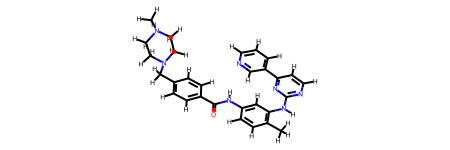

In [38]:
from rdkit import Chem
imatinib = Chem.MolFromSmiles('C1N(CCN(C1)Cc1ccc(cc1)C(Nc1cc(c(cc1)C)Nc1nccc(n1)c1cccnc1)=O)C ')
Chem.AllChem.EmbedMolecule(imatinib)
imatinib = Chem.AddHs(imatinib, addCoords=True)
imatinib

In [39]:
u = mda.Universe(imatinib)
u

<Universe with 68 atoms>

In [49]:
selection = u.select_atoms('smarts cC(=O)N')
selection

<AtomGroup with 4 atoms>

In [50]:
nv.show_mdanalysis(selection)

NGLWidget()

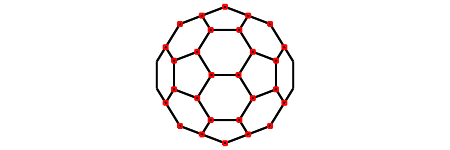

In [30]:
rdkit_fullerene = crystal.residues[0].atoms.convert_to.rdkit(NoImplicit=False)
rdkit_fullerene

### OpenMM

In [31]:
from simtk.openmm import app
structure = app.PDBxFile('4lzt.cif')
structure

In [32]:
u = mda.Universe(structure)
u

<Universe with 1164 atoms>

This works on [`Topology`](http://docs.openmm.org/7.0.0/api-python/generated/simtk.openmm.app.topology.Topology.html), [`PDBFile`](http://docs.openmm.org/7.0.0/api-python/generated/simtk.openmm.app.pdbfile.PDBFile.html#), [`PDBxFile`](http://docs.openmm.org/7.0.0/api-python/generated/simtk.openmm.app.pdbxfile.PDBxFile.html#), [`Modeller`](http://docs.openmm.org/7.0.0/api-python/generated/simtk.openmm.app.modeller.Modeller.html#), and [`Simulation`](http://docs.openmm.org/7.0.0/api-python/generated/simtk.openmm.app.simulation.Simulation.html#) objects.